(sec:random)=
# Osnove naključnih procesov

Dinamične obremenitve pogosto niso deterministične; primeri naključnih obremenitve so: obremenitve zaradi morskih valov, hrapavost ceste in vibracije zaradi pogonskega motorja. Take obremenitve je treba obravnavati kot **naključne procese**. V tem poglavju si bomo pogledali kako to naredimo in kako jih potem uspešno uporabimo pri obravnavi dinamskih sistemov. 

Naključnih podatkov v nasprotju z determinističnimi podatki ni mogoče natančno predvideti, določene značilnosti pa lahko razberemo z analizo njihovih segmentov; če na primer pomerimo hrapavost segmenta površine, lahko z določeno verjetnostjo sklepamo o značilnostih hrapavosti drugih segmentov. Pri opisu naključnih procesov si pogosto pomagamo s predpostavko naključni porazdelitvi procesa (npr. normalno ali Gaussovo porazdeljen proces).

Medtem, ko bi lahko naključni proces analizirali v časovni domeni, obstajajo pomanjkljivosti za uporabo takega pristopa. Za ustrezno vrednotenje procesa je treba v časovni domeni opraviti dovolj veliko število vzorčnih meritev (ali opazovanj), ki jih nato analiziramo kot skupino (ansambel, ang. *ensemble*). Kakor bomo videli pozneje, je strukturno dinamiko in naključne procese v frekvenčni domeni bistveno elegantneje analizirati.

Referenčna besedila, ki poglobljeno obravnavajo to temo, ki jih priporočajo bralcu, so {cite:t}`bendat_2011`, {cite:t}`newland_1993` ter {cite:t}`shin2008`. Nekatere vsebine so povzete po {cite:t}`slavic2020VF`.

## Kaj je naključni proces?

Naključni proces je definiran s kombinacijo **funkcije gostote verjetnosti** (ang. *Probability Density Function* - PDF) in **spektralno gostoto moči** (ang. *Power Spectral Density* - PSD).

Slika spodaj prikazuje ansambel $\left\{x_k(t)\right\}$ vzorčnih funkcij (opazovanj) $x_k(t)$, pri čemer je vsako opazovanje $k$ sestavljeno iz naključne spremenljivke v času $t_i$: $x_k(t_i)$. Kot bo obravnavano kasneje, predpostavki o stacionarnosti in ergodičnosti bistveno poenostavijo analizo naključnih podatkov (več pozneje).

![random_ensemble](./images/random_ensemble.svg)

## Normalna porazdelitev (Gaussov proces)

Gaussova porazdelitev je pogosto opažena pri različnih fizikalnih pojavih, njeno razširjenost pa pojasnjuje centralni limitni teorem (glejte {cite:t}`bendat_2011`. Na splošno je Gaussov proces tisti, pri katerem verjetnost kombinacije naključnih spremenljivk ob določenih časih $\left\{x(t_i)\right\}$ sledi večdimenzionalni Gaussovi porazdelitvi. Če pogledamo samo en trenutek v času $t$, verjetnost amplitude $x$ ureja normalna funkcija gostote verjetnosti (PDF) $p(x)$:

$$
p(x) = \frac{1}{\sigma \, \sqrt{2 \, \pi}} \, \mathrm{e}^{-\frac{(x-\mu)^2}{2 \,\sigma^2}}
$$

Tukaj je $\mu$ povprečna vrednost, $\sigma$ je standardni odklon (deviacija) oziroma $\sigma^2$ varianca.
Srednja vrednost $\mu$ in varianca $\sigma^2$ določata obliko PDF in se pogosto imenujeta prvi moment in drugi centralni moment; izračunamo ju s pomočjo funkcije gostote verjetnosti:


$$
\mu = \int_{-\infty}^{+\infty} x \, p(x)\, \textrm{d} x,
$$

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, p(x)\, \textrm{d} x.
$$

Primer različnih normalnih porazdelitev prikazuje slika spodaj.

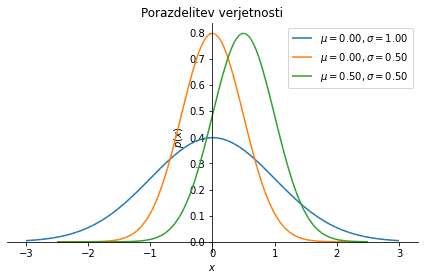

In [20]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

podatki = {σ: 1., μ: 0.}

p1 = sym.plot(p.subs(podatki), (x, -3*σ.subs(podatki), +3*σ.subs(podatki)), line_color='C0', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False, 
              title='Porazdelitev verjetnosti', ylabel='$p(x)$', xlabel='$x$')

podatki = {σ: 0.5, μ: 0.}
p2 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C1', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
podatki = {σ: 0.5, μ: 0.5}
p3 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C2', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

S spodnjim izračunom lahko preverimo, da sta prvi moment in drugi centralni moment za Gaussovo/normalno porazdelitev dejansko $\mu$  in $\sigma^2$:

In [42]:
import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

m1 = sym.integrate(x*p, (x, -sym.oo, +sym.oo))
cm2 = sym.integrate((x-μ)**2 * p, (x, -sym.oo, +sym.oo))

m1

\mu

In [41]:
cm2

\sigma**2

Spodaj je še primer numeričnega generiranja normalne porazdelitve in primerjava s teoretično funkcijo gostote verjetnosti.

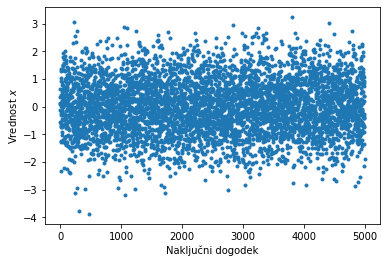

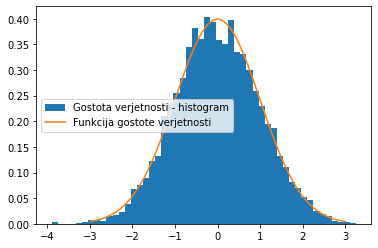

In [80]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
σ, μ, x, = sym.symbols('\sigma, \mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))
podatki = {σ: 1., μ: 0.}
pdf = sym.lambdify(x, p.subs(podatki))


rng = np.random.default_rng(0)
x = rng.normal(loc=podatki[μ], scale=podatki[σ], size=5000)
plt.plot(x, '.')
plt.xlabel('Naključni dogodek')
plt.ylabel('Vrednost $x$')
plt.show()

plt.hist(x, bins=50, density=True, label='Gostota verjetnosti - histogram')

x = np.linspace(-3*podatki[σ],3*podatki[σ], 100)
plt.plot(x, pdf(x), label='Funkcija gostote verjetnosti')
plt.legend()
plt.show()

## Momenti funkcije gostote verjetnosti

V nadaljevanju si bomo pogledali orodja za popis lastnosti naključnih procesov. Predpostavimo, da imamo dva naključna procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$, kjer je $k$ indeks ponovitve procesa ob času $t$. Statistično povprečje celotnega ansambla ponovitev procesa (čez indeksa $k$) označimo kot:

$$
\begin{split}
\mu_x(t) &= E[x(t)],\\
\mu_y(t) &= E[y(t)].\\
\end{split}
$$

Povprečje se lahko spreminja s časom $t$.

:::{note}

Zgornji izraz posplošimo tako, da definiramo **$n$-ti moment funkcije gostote verjetnosti**:

$$
\mu_{x}^n(t)= E[x^n(t)] = \int_{-\infty}^{+\infty} x^n\, p(x)\, \textrm{d} x
$$

:::

*Kovariančne funkcije* so za dva procesa definirane $\left\{x_k(t)\right\}$ in $\left\{y_k(t) \right\}$ kot:

$$
\begin{split}
C_{xx}(t, t+\tau) &= E \big{[}[x(t) - \mu_x(t)] \, [x(t+\tau) - \mu_x(t+ \tau)]\big{]}, \\
C_{yy}(t, t+\tau) &= E \big{[}[y(t) - \mu_y(t)] \, [y(t+\tau) - \mu_y(t+ \tau)]\big{]}, \\
C_{xy}(t, t+\tau) &= E \big{[}[x(t) - \mu_x(t)] \, [y(t+\tau) - \mu_y(t+ \tau)]\big{]} \\
\end{split}
$$

Poseben primer, vreden pozornosti, je pri $\tau = 0$:

$$
\begin{split}
C_{xx}(t, t) &= E \big{[}[x(t) - \mu_x(t)]^2\big{]}= \sigma_x^2(t), \\
C_{yy}(t, t) &= E \big{[}[y(t) - \mu_y(t)]^2\big{]}= \sigma_y^2(t), \\
C_{xy}(t, t) &= E \big{[}[x(t) - \mu_x(t)] \, [y(t) - \mu_y(t)]\big{]} = C_{xy}(t)\\
\end{split}
$$

Varianci $\sigma_x^2(t)$ in $\sigma_y^2(t)$ sta tako definirani in $C_{xy}(t)$ je kovarianca med $\left \{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$ ob času $t$. 

Če bi analizirali proces dvodimenzionalni normalni porazdelitvi, bi bile lastnosti $\sigma_x^2(t)$, $\sigma_y^2(t)$ in $C_{xy}(t)$ dovolj za  popis verjetnosti v določenih časovnih točkah $t$.

:::{note}

Zgornji izraz posplošimo tako, da definiramo **$n$-ti centralni moment funkcije gostote verjetnosti**:

$$
\sigma^n(t)= E[(x(t)-\mu_x)^n] = \int_{-\infty}^{+\infty} (x-\mu_x)^n\, p(x)\, \textrm{d} x
$$

:::

:::{note}

Za naključna procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$ pravimo, da sta **šibko stacionarna**, ko so srednje vrednosti in kovariančne funkcije časovno neodvisne. Procesi se štejejo za **močno stacionarne**, ko so časovno neodvisni tudi statistični momenti višjega reda in križni momenti. Šibka in močna stacionarnost sovpadata za Gaussov proces (funkcijo porazdelitve verjetnosti je mogoče izpeljati samo iz srednjih vrednosti in kovarianc {cite}`newland_1993`).

:::

:::{note}

**Auto-korelacijska** $R_{xx}(\tau)$ in **križno korelacijska** funkcija $R_{xy}(\tau)$ se uporabljajo za stacionarne naključne procese in je enaka kovariančnim funkcijam v primeru procesa z in ničelno srednjo vrednostjo:

$$
\begin{split}
R_{xx}(\tau) &= E[ x_k(t) \, x_k(t+\tau)], \\
R_{yy}(\tau) &= E[ y_k(t) \, y_k(t+\tau)], \note\
R_{xy}(\tau) &= E[ x_k(t) \, y_k(t+\tau)]. \\
\end{split}
$$

:::

## Ergodičnost

Namesto, da srednjo vrednost določamo čez ansambel, lahko srednjo vrednost določimo na podlagi časovnega povprečja:

$$
\begin{split}
\mu_x(k) &= \lim_{T \to \infty} \frac{1}{T}\int_{0}^{T} x_k(t)\, \textrm{d}  t, \\
\mu_y(k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} y_k(t)\, \textrm{d}  t.\\
\end{split}
$$

Prerosto povedano: če bi hkrati vrglo igralno kocko za *Človek ne jezi* se 1000 ljudi, bi dobili zelo podoben rezultat kakor pa, če bi ena oseba vrgla kocko 1000 krat. Pri tem moramo predpostaviti, da zaporedni dogodki v času (ko meče ena oseba) niso med seboj povezani. V zgornji emačbi tako opazujemo $k$-ti proces v času.

Podobno lahko trdimo za kovariančno funkcijo:

$$
\begin{split}
C_{xx}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[x_k(t)-\mu_x(k)\right] \, \left[x_k(t+\tau) - \mu_x(k)\right] \textrm{d}  t \\
&= R_{xx}(\tau, k) - \mu_x^2(k), \\
C_{yy}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[y_k(t)-\mu_y(k)\right] \, \left[y_k(t+\tau) - \mu_y(k)\right] \textrm{d}  t \\
&= R_{yy}(\tau, k) - \mu_y^2(k), \\
C_{xy}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[x_k(t)-\mu_x(k)\right] \, \left[y_k(t+\tau) - \mu_y(k)\right] \textrm{d}  t \\
&= R_{xy}(\tau, k) - \mu_x(k) \, \mu_y(k). \\
\end{split}
$$

:::{note}

Proces rečemo, da je **šibko ergodičen** (ang. *weakly ergodic*), če so časovna povprečja enaka povprečjem ansambla, neodvisno od izbranega $k$:

$$
\begin{split}
\mu_x(k) &= \mu_x, \\
\mu_y(k) &= \mu_y, \\
C_{xx}(\tau, k) &= C_{xx}(\tau), \\
C_{yy}(\tau, k) &= C_{yy}(\tau), \\
C_{xy}(\tau, k) &= C_{xy}(\tau). \\
\end{split}
$$

:::

Če pogoji šibke ergodičnosti veljajo za vse statistične lastnosti višjega reda, je proces **močno ergodičen** (ang. *strongly ergodic*). Za Gaussovo porazdelitev pa sta močna in šibka ergodičnost zamenljiva izraza, kot je bilo v primeru stacionarnosti - prvi moment in drugi centralni moment sta dovolj za enolični opis Gaussove porazdelitve. V takih primerih so statistične lastnosti vsake ločene vzorčne funkcije reprezentativne za celoten ansambel. Pri nadaljnji analizi ergodičnih procesov lahko torej indeks $k$ izpustimo in vzorčno funkcijo, ki v celoti opisuje lastnosti naključnega procesa, označimo z $x(t)$.

Ergodičnost je pomembna iz različnih razlogov: poenostavlja nadaljnjo teoretično obravnavo naključnih procesov; še pomembneje pa je, da omogoča analizo dejansko izmerjenih naključnih podatkov. Namesto analize velikega ansambla časovnih zgodovin pri istem času $t$, običajno zadostuje, da si ogledamo eno samo časovno zgodovino in na podlagi predpostavke ergodičnosti izluščimo iz nje potrebne statistične lastnosti.